In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import rc


In [14]:
# 한글 폰트 설정
rc('font', family='AppleGothic')  # MacOS에서는 'AppleGothic' 사용 가능
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로 설정
loan_file = "/Users/jiwon/Desktop/데이터톤/dont_mess/대출정보.csv"
book_info_file = "/Users/jiwon/Desktop/데이터톤/dont_mess/org+preptype+repyr+lastyr.csv"

# 데이터 로드
loan_df = pd.read_csv(loan_file, encoding="euc-kr")
book_info_df = pd.read_csv(book_info_file, encoding="utf-8")

# 열 이름 확인 및 수정
loan_df.columns = loan_df.columns.str.strip()
book_info_df.columns = book_info_df.columns.str.strip()

# 날짜 형식 변환 및 년도 추출
loan_df["대출일시"] = pd.to_datetime(loan_df["대출일시"], errors='coerce')
loan_df = loan_df.dropna(subset=["대출일시"])
loan_df["년도"] = loan_df["대출일시"].dt.year

# 필요한 열만 추출
book_info_df = book_info_df[["도서ID", "주류"]]

# 데이터 병합
merged_df = pd.merge(loan_df, book_info_df, on="도서ID", how="inner")

# 년도별 장르별 대출 건수 계산
genre_by_year = merged_df.groupby(["년도", "주류"]).size().reset_index(name="대출건수")

# 장르별 고유 색상 매핑
unique_genres = genre_by_year["주류"].unique()
colors_palette = plt.cm.tab20.colors  # 색상 팔레트 사용
genre_color_map = {genre: colors_palette[i % len(colors_palette)] for i, genre in enumerate(unique_genres)}

# 결과 저장 디렉토리 생성
output_dir = "genre_pie_charts"
os.makedirs(output_dir, exist_ok=True)

# 1950년부터 2025년까지 파이 차트 생성 및 저장
for year in range(1950, 2026):
    selected_data = genre_by_year[genre_by_year["년도"] == year]
    if not selected_data.empty:
        plt.figure(figsize=(10, 8))
        colors = [genre_color_map[genre] for genre in selected_data["주류"]]
        plt.pie(
            selected_data["대출건수"], 
            labels=selected_data["주류"], 
            autopct="%1.1f%%", 
            startangle=140, 
            colors=colors
        )
        plt.title(f"{year}년 장르별 대출 비율", fontsize=16)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"genre_pie_{year}.png"))
        plt.close()


/Users/jiwon/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (7,8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# 년도별 장르별 대출 건수 비율 계산
genre_by_year_pivot = genre_by_year.pivot(index="년도", columns="주류", values="대출건수").fillna(0)

# 결과 저장 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)

# 년도별 파이 차트 생성
for year in genre_by_year_pivot.index:
    year_data = genre_by_year_pivot.loc[year]
    year_data = year_data[year_data > 0]  # 대출 건수가 0인 장르는 제외
    colors = [color_map[genre] for genre in year_data.index]  # 색상 매핑
    
    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(
        year_data,
        labels=year_data.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
    )
    plt.title(f"{year}년 장르별 대출 비율", fontsize=14)
    
    # 파일 저장
    output_file_pie = os.path.join(output_dir, f"genre_pie_{year}.png")
    plt.savefig(output_file_pie)
    plt.show()


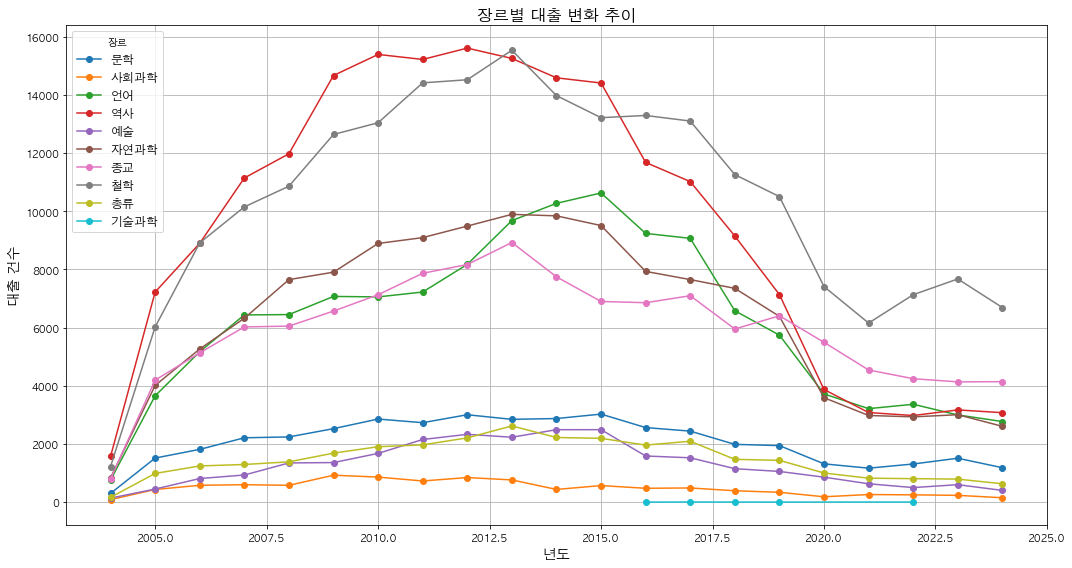

In [10]:
# 장르별 대출 변화 추이 시각화
output_dir = "genre_trends"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(15, 8))
for genre in genre_by_year["주류"].unique():
    genre_data = genre_by_year[genre_by_year["주류"] == genre]
    plt.plot(genre_data["년도"], genre_data["대출건수"], marker='o', label=genre)

plt.title("장르별 대출 변화 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(title="장르", fontsize=12, loc="upper left")
plt.grid(True)
plt.tight_layout()
output_file = os.path.join(output_dir, "genre_trends_line_graph.png")
plt.savefig(output_file)
plt.show()


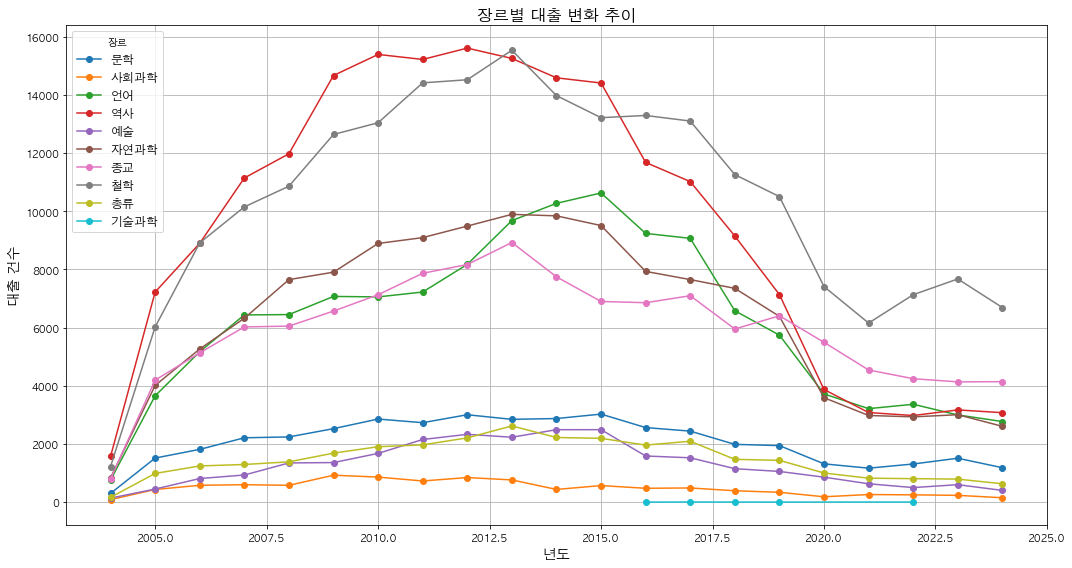

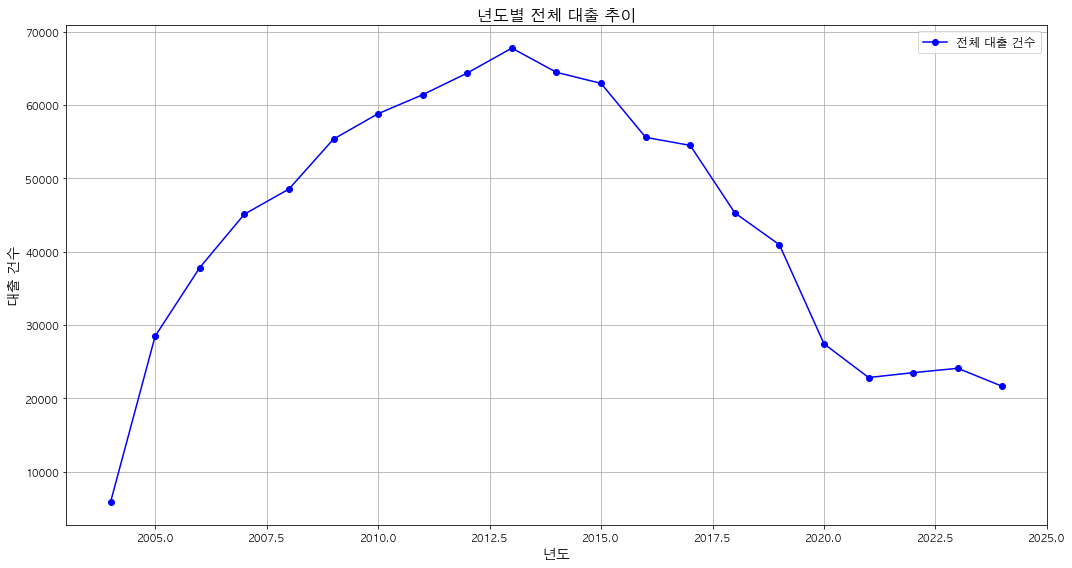

In [11]:
# 년도별 전체 대출 건수 계산
overall_by_year = loan_df.groupby("년도").size().reset_index(name="대출건수")

# 결과 저장 디렉토리 생성
output_dir = "genre_trends"
os.makedirs(output_dir, exist_ok=True)

# 장르별 대출 변화 추이 시각화
plt.figure(figsize=(15, 8))
for genre in genre_by_year["주류"].unique():
    genre_data = genre_by_year[genre_by_year["주류"] == genre]
    plt.plot(genre_data["년도"], genre_data["대출건수"], marker='o', label=genre)

plt.title("장르별 대출 변화 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(title="장르", fontsize=12, loc="upper left")
plt.grid(True)
plt.tight_layout()
output_file_genre = os.path.join(output_dir, "genre_trends_line_graph_2.png")
plt.savefig(output_file_genre)
plt.show()

# 전체 대출 변화 추이 시각화
plt.figure(figsize=(15, 8))
plt.plot(overall_by_year["년도"], overall_by_year["대출건수"], marker='o', color='b', label="전체 대출 건수")
plt.title("년도별 전체 대출 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
output_file_overall = os.path.join(output_dir, "overall_trends_line_graph.png")
plt.savefig(output_file_overall)
plt.show()

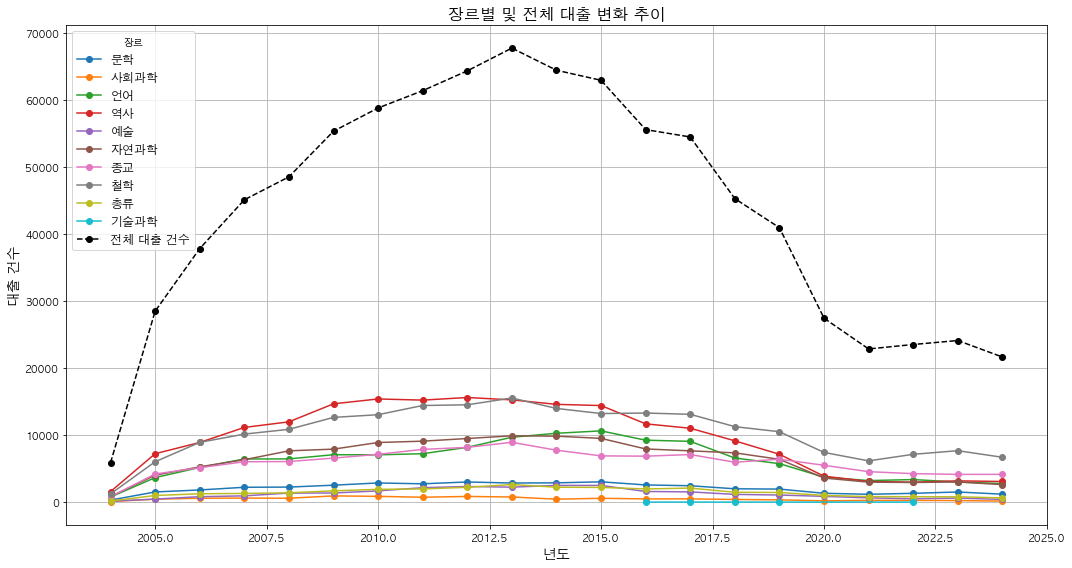

In [12]:
# 결과 저장 디렉토리 생성
output_dir = "genre_trends"
os.makedirs(output_dir, exist_ok=True)

# 장르별 및 전체 대출 변화 추이 시각화
plt.figure(figsize=(15, 8))
for genre in genre_by_year["주류"].unique():
    genre_data = genre_by_year[genre_by_year["주류"] == genre]
    plt.plot(genre_data["년도"], genre_data["대출건수"], marker='o', label=genre)

# 전체 대출 건수 추가
plt.plot(overall_by_year["년도"], overall_by_year["대출건수"], marker='o', color='black', linestyle='--', label="전체 대출 건수")

plt.title("장르별 및 전체 대출 변화 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(title="장르", fontsize=12, loc="upper left")
plt.grid(True)
plt.tight_layout()
output_file_combined = os.path.join(output_dir, "combined_trends_line_graph.png")
plt.savefig(output_file_combined)
plt.show()


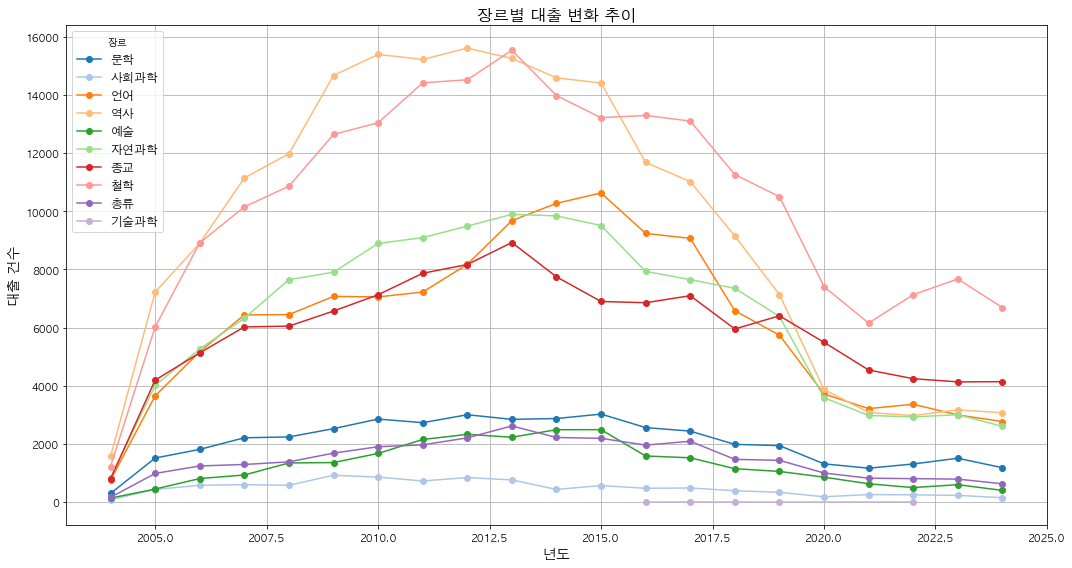

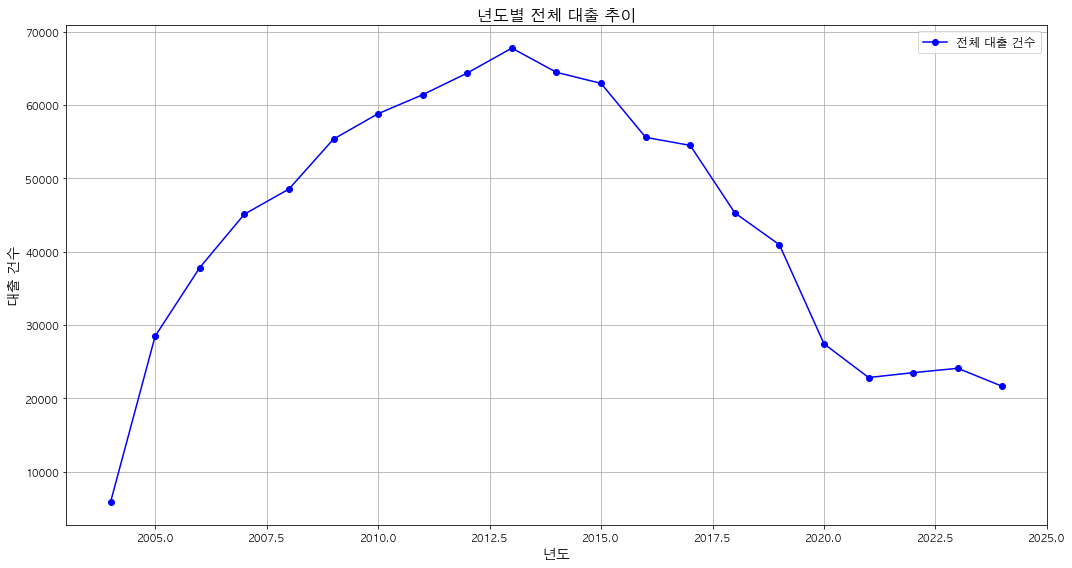

In [15]:
plt.figure(figsize=(15, 8))
for genre in genre_by_year["주류"].unique():
    genre_data = genre_by_year[genre_by_year["주류"] == genre]
    color = genre_color_map[genre]  # 장르별 고유 색상 적용
    plt.plot(
        genre_data["년도"], 
        genre_data["대출건수"], 
        marker='o', 
        label=genre, 
        color=color
    )

plt.title("장르별 대출 변화 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(title="장르", fontsize=12, loc="upper left")
plt.grid(True)
plt.tight_layout()
output_file_genre = os.path.join(output_dir, "genre_trends_line_graph_2.png")
plt.savefig(output_file_genre)
plt.show()

# 전체 대출 변화 추이 시각화 (색상 변경 없음)
plt.figure(figsize=(15, 8))
plt.plot(
    overall_by_year["년도"], 
    overall_by_year["대출건수"], 
    marker='o', 
    color='b',  # 전체 대출 건수는 파란색으로 유지
    label="전체 대출 건수"
)
plt.title("년도별 전체 대출 추이", fontsize=16)
plt.xlabel("년도", fontsize=14)
plt.ylabel("대출 건수", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
output_file_overall = os.path.join(output_dir, "overall_trends_line_graph.png")
plt.savefig(output_file_overall)
plt.show()
